# GRIP Task 3 : Exploratory Data Analysis - Retail

**Importing the necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Finding the shape of the dataset**

In [4]:
print(df.shape)

(9994, 13)


**Description of the Dataset**

In [5]:
df.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
print(df.isna().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


**Dropping Duplicate Values**

In [7]:
df.drop_duplicates(keep = 'first' , inplace = True)

**Finding out the Correlation between different Columns**

<AxesSubplot:>

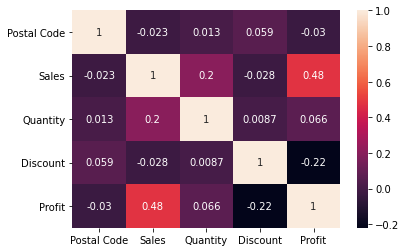

In [8]:
corr = df.corr()
sns.heatmap(corr, annot = True)

**Counting the Number of Units under Each Category**

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


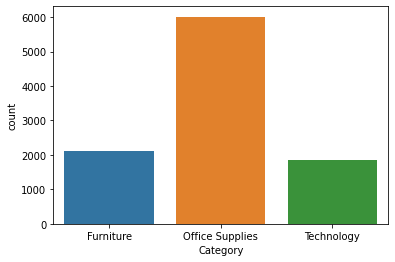

In [28]:
sns.countplot(df['Category'])
plt.show()

**Counting the number of units under each Segment**

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


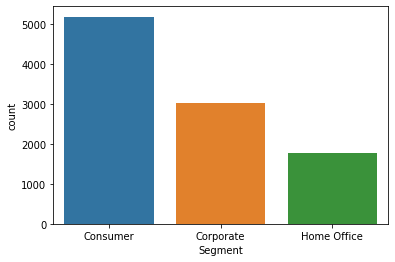

In [9]:
sns.countplot(df['Segment'])
plt.show()

**Representing the Amount of Sales in each State using a Bar Graph**

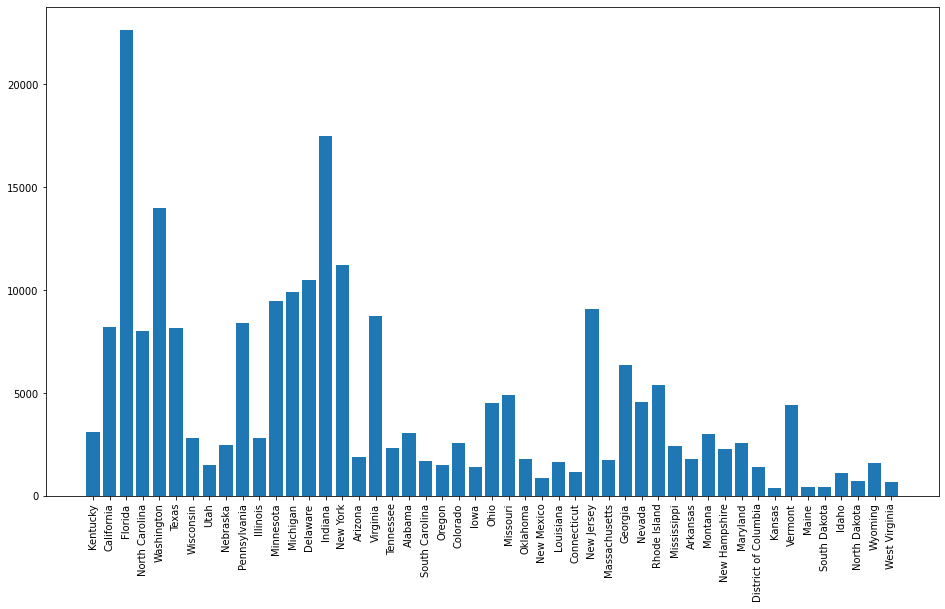

In [10]:
plt.figure(figsize = (16,9))
plt.bar('State', 'Sales',data = df)
plt.xticks(rotation = 90)
plt.show()

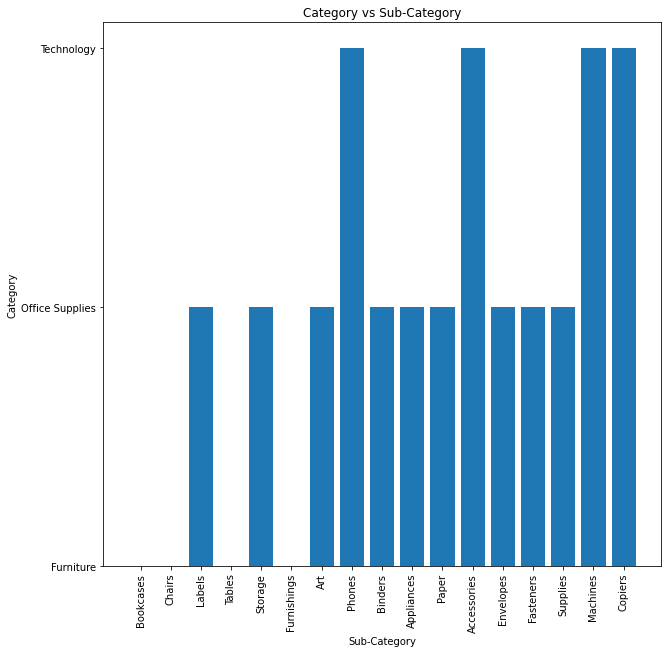

In [14]:
plt.figure(figsize = (10,10))
plt.bar('Sub-Category', 'Category', data = df)
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.title("Category vs Sub-Category")
plt.xticks(rotation = 90)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


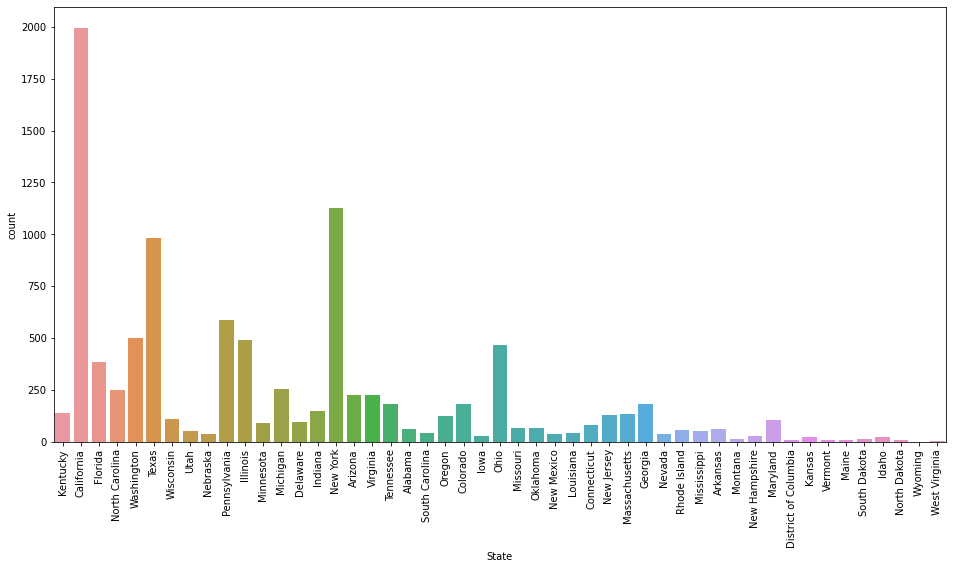

In [15]:
plt.figure(figsize = (16,8))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

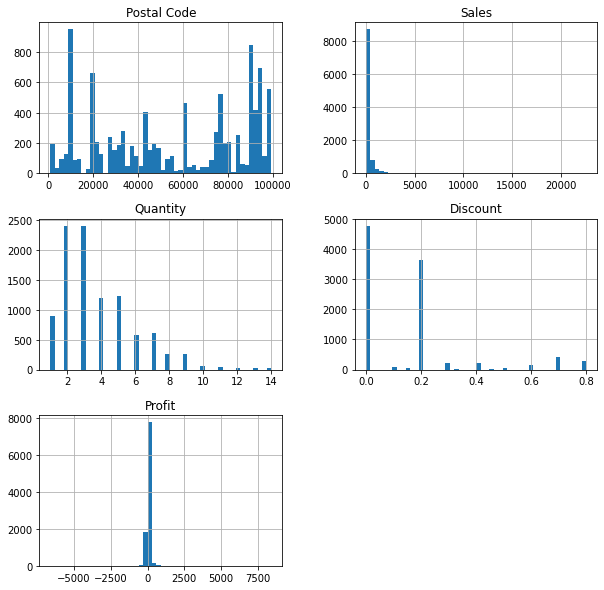

In [16]:
df.hist(figsize=(10,10), bins = 50)
plt.show()

**From this we can infer that the data is not Normal**

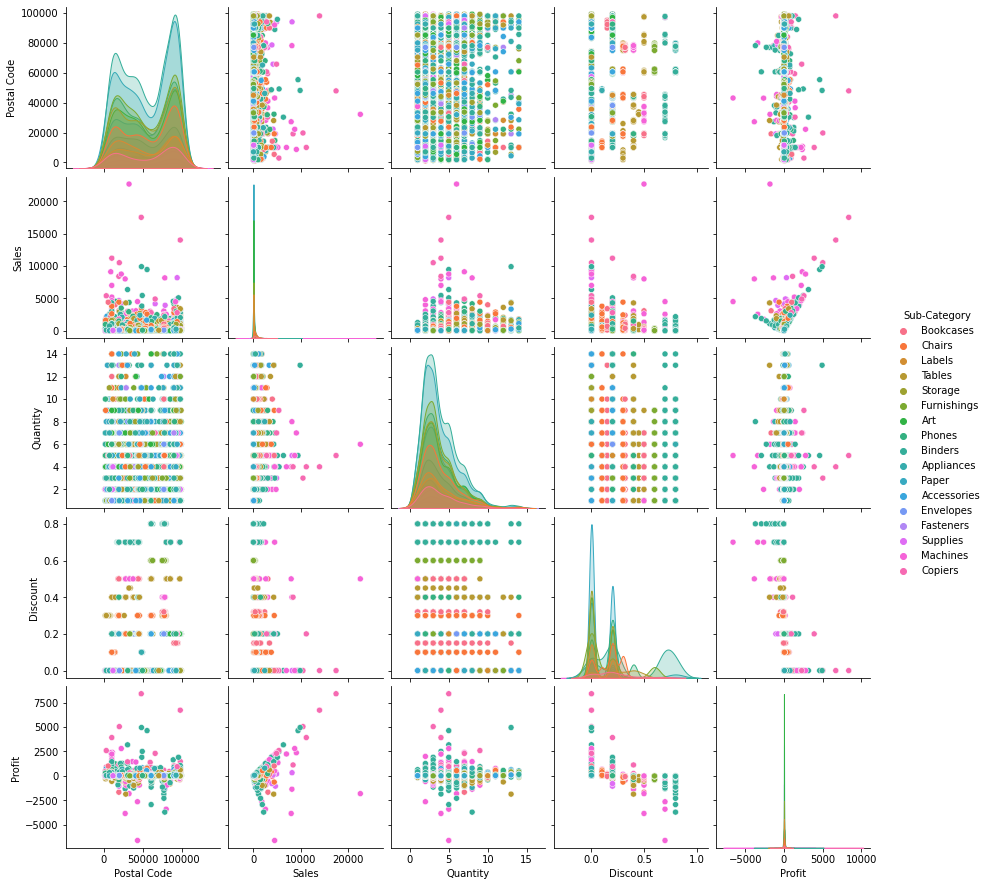

In [17]:
figsize = (15,10)
sns.pairplot(df, hue = 'Sub-Category')
plt.show()

**Representing the Amount of Sales in each Sub-Category**

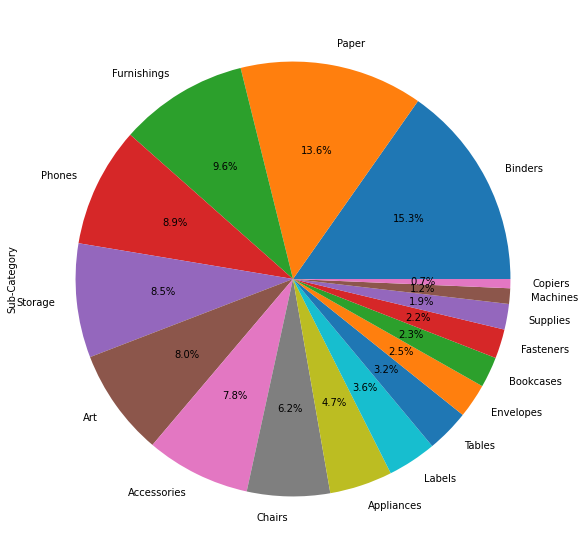

In [18]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

**Representing the amount of Sales in each Region**

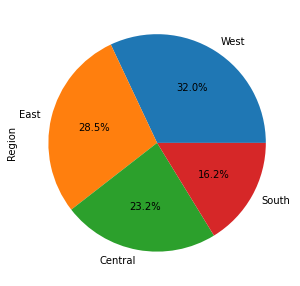

In [20]:
plt.figure(figsize = (5,5))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

In [21]:
df1 = df[['City', 'Category', 'State', 'Sales', 'Profit']]

**Heatmap of Sales in every City by Category**

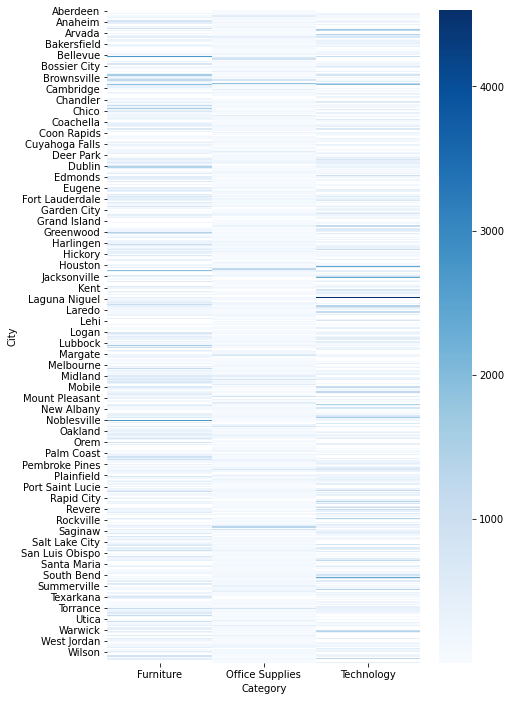

In [43]:
heatmap1 = pd.pivot_table(df1, values = 'Sales', index = ["City"], columns = 'Category')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap1, cmap = 'Blues')
plt.show()

**Heatmap of Sales in every State by Category**

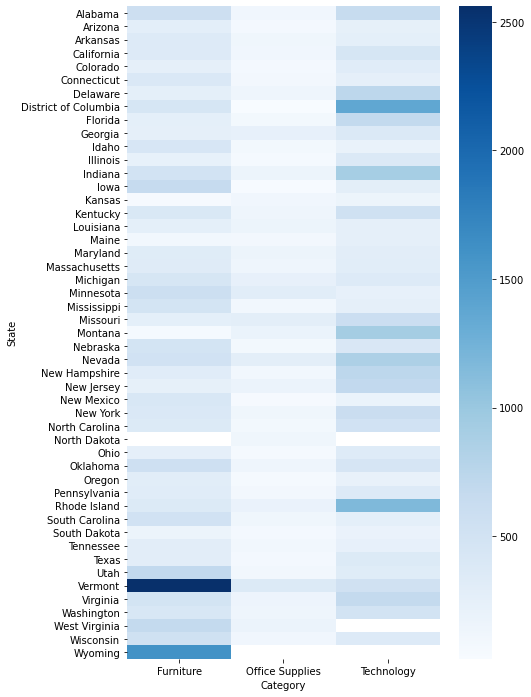

In [26]:
heatmap2 = pd.pivot_table(df1, values = 'Sales', index = ['State'], columns = 'Category')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap2, cmap = 'Blues')
plt.show()

**Heatmap of Profit in every City by Category**

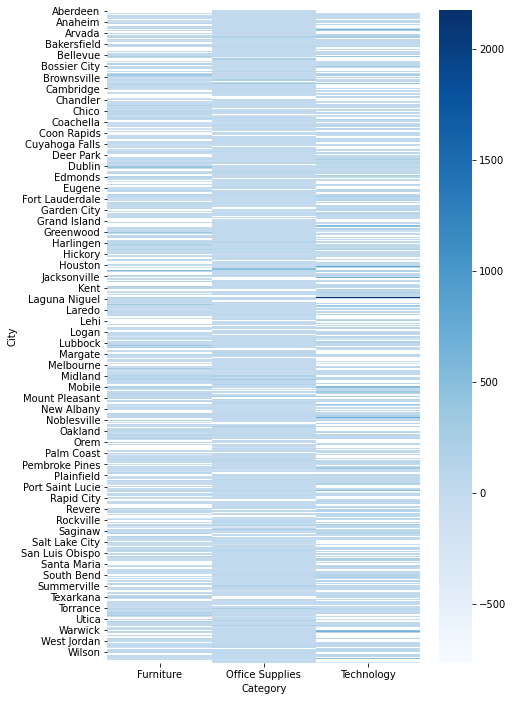

In [27]:
heatmap3 = pd.pivot_table(df1, values = 'Profit', index = 'City', columns = 'Category')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap3, cmap = 'Blues')
plt.show()

**Heatmap of Profit in every State by Category**

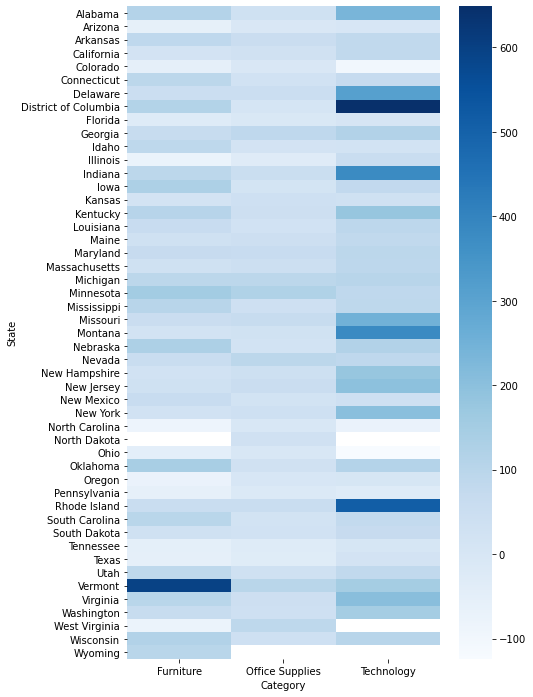

In [32]:
heatmap4 = pd.pivot_table(df1, values = 'Profit', index = ['State'], columns = 'Category')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap4, cmap = 'Blues')
plt.show()

**Heatmap of Profit in every City by Segment**

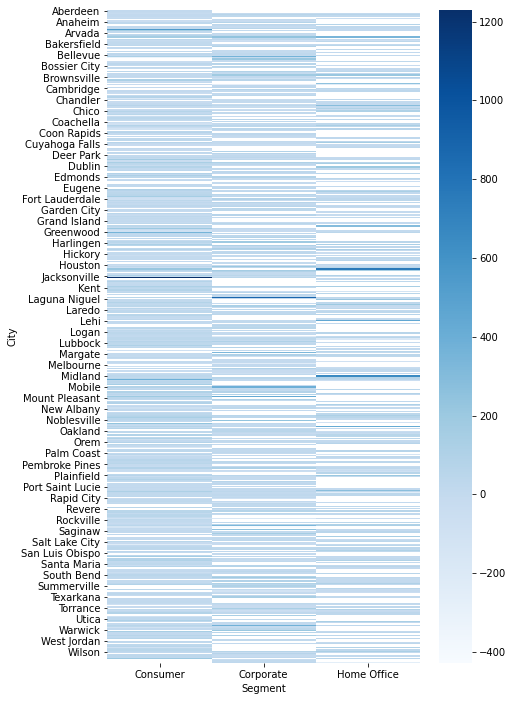

In [36]:
heatmap5 = pd.pivot_table(df, values = 'Profit', index = ["City"], columns = 'Segment')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap5, cmap = 'Blues')
plt.show()

**Heatmap of Profit in every State by Segment**

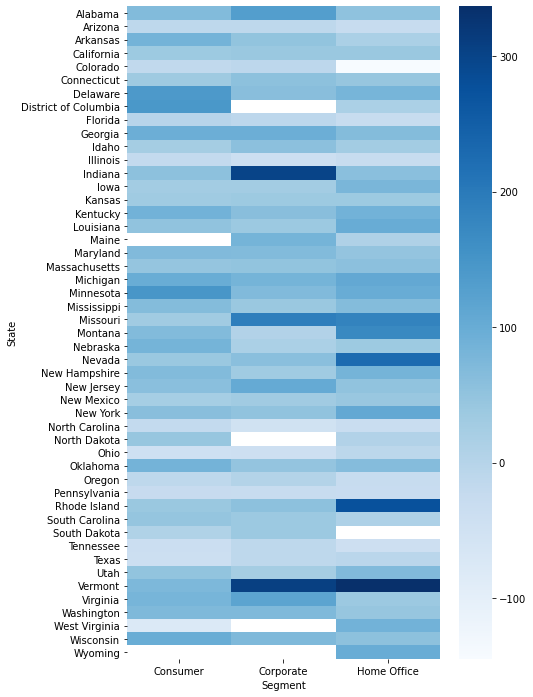

In [37]:
heatmap6 = pd.pivot_table(df, values = 'Profit', index = ["State"], columns = 'Segment')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap6, cmap = 'Blues')
plt.show()

**Heatmap of Sales in every City by Sub-Category**

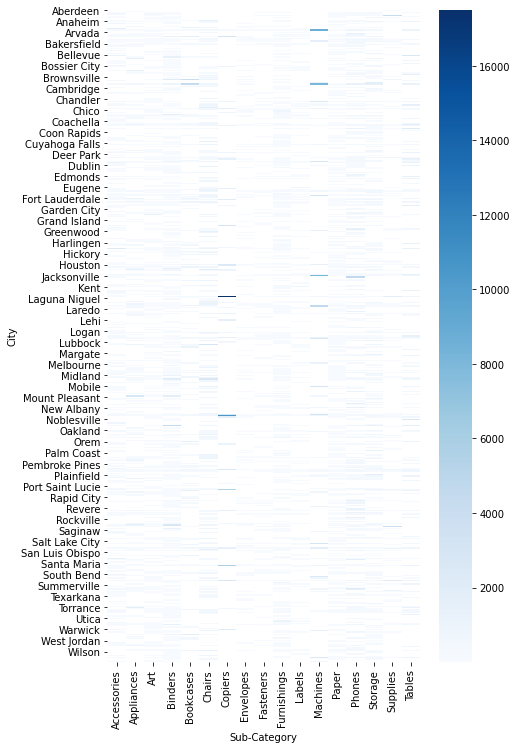

In [38]:
heatmap7 = pd.pivot_table(df, values = 'Sales', index = ["City"], columns = 'Sub-Category')
plt.figure(figsize = (7,12))
sns.heatmap(heatmap7, cmap = 'Blues')
plt.show()

**Heatmap of Profit in every State by Sub-Category**

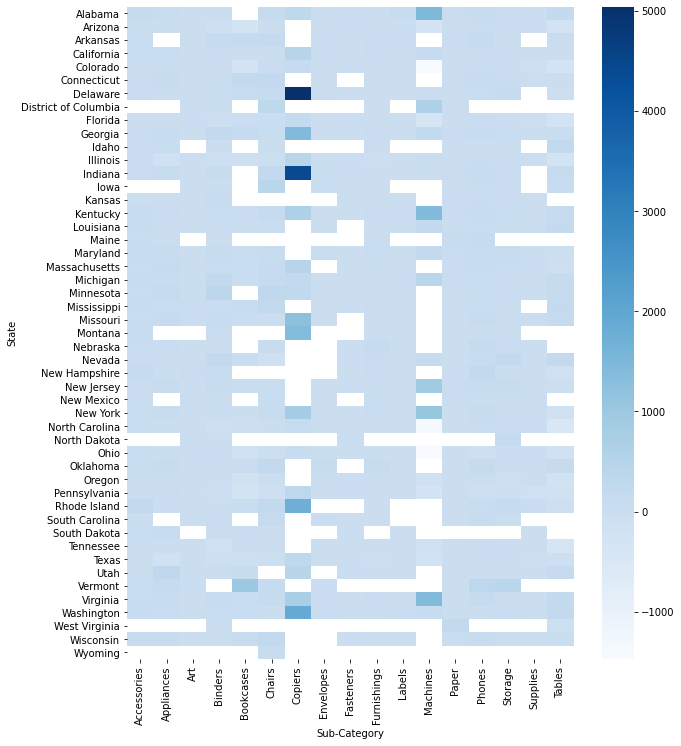

In [44]:
heatmap8 = pd.pivot_table(df, values = 'Profit', index = ["State"], columns = 'Sub-Category')
plt.figure(figsize = (10,12))
sns.heatmap(heatmap8, cmap = 'Blues')
plt.show()

**Comparison of Sales and Profit for each Sub-Category**

<ipython-input-45-fb831c1da51f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Sales', 'Profit'].agg('sum').plot.bar()


<Figure size 720x792 with 0 Axes>

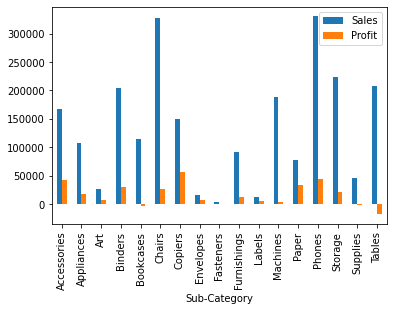

In [45]:
plt.figure(figsize = (10,11))
df.groupby('Sub-Category')['Sales', 'Profit'].agg('sum').plot.bar()
plt.show()